In [2]:
import numpy as np
import pandas as pd
import torch
from torch import optim
from torch.autograd import Variable
import torch.optim as optim
import matplotlib.pyplot as plt
%matplotlib inline

Text(0, 0.5, 'Y')

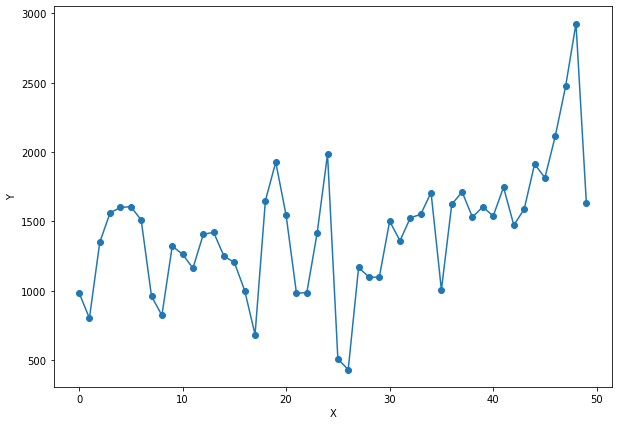

In [3]:
data_path='hour.csv'
rides=pd.read_csv(data_path)
rides.head()
counts=rides['cnt'][:50]
x=np.arange(len(counts))
y=np.array(counts)
plt.figure(figsize=(10,7))
plt.plot(x,y,'o-')
plt.xlabel('X')
plt.ylabel('Y')

In [9]:
x=Variable(torch.FloatTensor(np.arange(len(counts),dtype=float)))
y=Variable(torch.FloatTensor(np.array(counts,dtype=float)))
print('x.shape=',x.shape)
print('y.shape=',y.shape)
print('len(x)=',len(x))

sz=10
weights = Variable(torch.randn(1,sz),requires_grad = True)
biases = Variable(torch.randn(sz),requires_grad = True)
weights2 = Variable(torch.randn(sz,1),requires_grad = True)
learning_rate = 0.00001
losses = []
for i in range(1):
    hidden=x.expand(sz,len(x)).t()*weights.expand(len(x),sz)+biases.expand(len(x),sz)
    print('x.shape=',x.shape)
    print('weights.shape=',weights.shape)
    print('biases.shape=',biases.shape)
    print('hidden.shape= ',hidden.shape)
    print('x.expand(sz,len(x)).shape= ',x.expand(sz,len(x)).shape)
    print('weights.expand(len(x),sz).shape= ',weights.expand(len(x),sz).shape)
    print('(x.expand(sz,len(x)).t()*weights.expand(len(x),sz)).shape= ',(x.expand(sz,len(x)).t()*weights.expand(len(x),sz)).shape)
    print('biases.expand(len(x),sz).shape= ',biases.expand(len(x),sz).shape)


x.shape= torch.Size([50])
y.shape= torch.Size([50])
len(x)= 50
x.shape= torch.Size([50])
weights.shape= torch.Size([1, 10])
biases.shape= torch.Size([10])
hidden.shape=  torch.Size([50, 10])
x.expand(sz,len(x)).shape=  torch.Size([10, 50])
weights.expand(len(x),sz).shape=  torch.Size([50, 10])


TypeError: mul(): argument 'other' (position 1) must be Tensor, not torch.Size

In [ ]:
    hidden=torch.sigmoid(hidden)
    predictions=hidden.mm(weights2)
    loss=torch.mean((predictions-y)**2)
    losses.append(loss.data.numpy())
    if i%10000 == 0:
        print('loss:',loss)
    loss.backward()

    weights.data.add_(-learning_rate*weights.grad.data)
    biases.data.add_(-learning_rate*biases.grad.data)
    weights2.data.add_(-learning_rate*weights2.grad.data)

    weights.grad.data.zero_()
    biases.grad.data.zero_()
    weights2.grad.data.zero_()

Text(0, 0.5, 'loss')

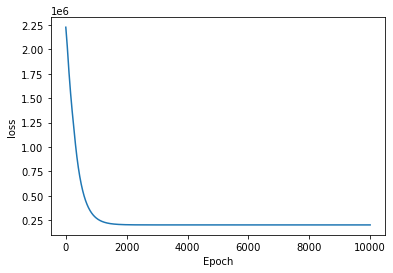

In [18]:
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('loss')



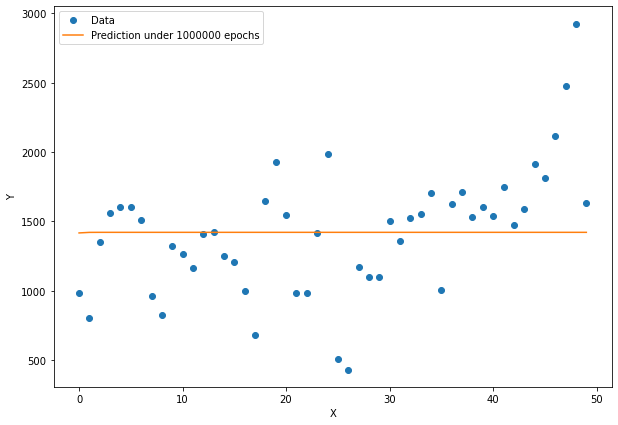

In [20]:
x_data=x.data.numpy()
plt.figure(figsize=(10,7))
xplot, = plt.plot(x_data,y.data.numpy(),'o')
yplot, = plt.plot(x_data,predictions.data.numpy())
plt.xlabel('X')
plt.ylabel('Y')
plt.legend([xplot,yplot],['Data','Prediction under 1000000 epochs'])
plt.show()

In [9]:
x=Variable(torch.FloatTensor(np.arange(len(counts),dtype=float)/len(counts)))

tensor(1226351.3750, grad_fn=<MeanBackward1>)


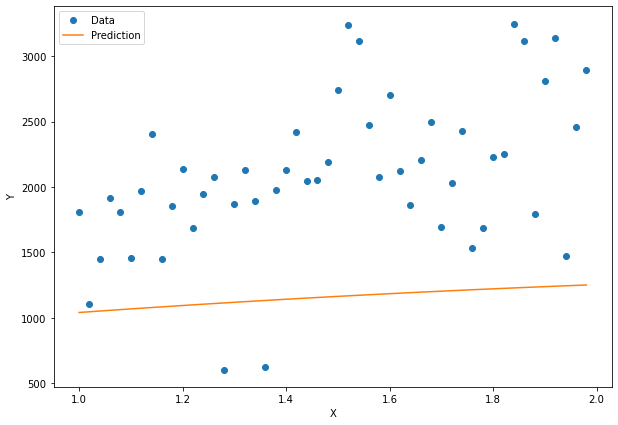

In [11]:
counts_predict=rides['cnt'][50:100]
x=Variable(torch.FloatTensor((np.arange(len(counts_predict),dtype=float)+len(counts))/len(counts)))
y=Variable(torch.FloatTensor(np.array(counts_predict,dtype=float)))
hidden = x.expand(sz,len(x)).t()
hidden = torch.sigmoid(hidden)
predictions=hidden.mm(weights2)
loss=torch.mean((predictions-y)**2)
print(loss)

x_data=x.data.numpy()
plt.figure(figsize=(10,7))
xplot,=plt.plot(x_data,y.data.numpy(),'o')
yplot,=plt.plot(x_data,predictions.data.numpy())
plt.xlabel('X')
plt.ylabel('Y')
plt.legend([xplot,yplot],['Data','Prediction'])
plt.show()